# Análisis exploratorio y descriptivo sobre accidentes cerebrovasculares

## Tabla de contenido

 * [Capítulo 1: Descricpión del problema](#chapter1)
    * [Sección 1.1: Breve descrición del problema](#section_1_1)
    * [Sección 1.2: Parámetros del problema](#section_1_2)
    * [Sección 1.3: Objetivos](#section_1_3)
    
 * [Capítulo 2: Carga, entendiendo y limpieza de la información](#chapter2)
    * [Sección 2.1: Carga de la información](#section_2_1)
    * [Sección 2.2: Entendimiento de la información](#section_2_2)
    * [Sección 2.3: Limpieza de la información](#section_2_3)
    
 * [Capítulo 3: Analísis descriptivo](#chapter3)
    * [Sección 3.1: Nuevas variables](#section_3_1)
    * [Sección 3.2: Visualización de la información](#section_3_2)

 * [Capítulo 4: Analísis Estadísticos y Regresión](#chapter4)   

 * [Capítulo 5: Conclusiones](#chapter5)

## Capítulo 1: Descripción del problema <a class="anchor" id="chapter1"></a>
- - -
### Sección 1.1: Breve descrición del problema<a class="anchor" id="section_1_1"></a>

De acuerdo con la Organización Mundial de la Salud (OMS, o WHO en inglés), los accidentes cerebrovasculares son las 2° causa de muerte global, responsable de aproximadamente un 11% del total de muertes [Kaggle]. El siguiente dataset contiene una serie de parámetros de salud de diferentes pacientes junto que a una variable dummy indicando si el paciente tuvo o no un accidente cerebro vascular. 
- - -
### Sección 1.2: Parámetros del problema<a class="anchor" id="section_1_2"></a>
#### A continuación se indican todas los parámetros incluidos en el dataset: 
- id: es el identificador único del paciente
- gender (género): "Male", "Female" o "Other"
- Age (edad): edad del paciente
- hypertension (hipertensión): 0 si el paciente no tiene hipertensión, 1 en caso contrario
- heart_disease (cardiopatía): 0 si el paciente no tuvo o tiene cardiopatía, 1 en caso contrario
- ever_married (Alguna vez casado): "No" o "Yes"
- work_type (tipo de trabajo): "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type (tipo de residencia): "Rural" o "Urban"
- avg_glucose_level: promedio del nivel de glucosa en la sangre
- bmi: índice de masa corporal
- smoking_status (estado de fumador): "formerly smoked", "never smoked", "smokes" or "Unknown" (información no disponible)
- stroke (Accidente cerebrovascular): 1 si el paciente tuve un accidente cerebrovascular y 0 si no. 

#### Siendo un total de 11 variables que describen al paciente.
- - -

### Sección 1.3: Objetivos <a class="anchor" id="section_1_3"></a>

Se busca realizar un análisis exploratorio para determinar una comparativa entre las personas que tuvieron o no un accidente cerebrovascular mediante diferentes tendencias y análisis estadístico de sus características. Además, se realizará un análisis ANOVA para determinar la significancia estadística de qué variables podrían ser buenas predictoras en una regresión de clasificación para determinar si es que el paciente puede sufrir o no un accidente cerebrovascular.
El problema puede verse en Kaggle dando clic [Aca](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

## Capítulo 2: Carga, entendiendo y limpieza de la información <a class="anchor" id="chapter2"></a>
- - -
### Sección 2.1: Carga de la información<a class="anchor" id="section_2_1"></a>
#### La información se descarga desde Kaggle en forma .zip, la que debe ser leída y extraida en el fichero. Por resguardar información personal, se comparte el formato .zip junto con el archivo de Jupyter. 

In [1]:
# a continuación se cargan todas las librerias con las que se trabajaran en el desarrollo del problema
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


#### A continuación se lee el archivo .csv descargado desde Kaggle y se verifica su contenido


In [3]:
ruta_archivo = os.path.join("","healthcare-dataset-stroke-data.csv")
dataset = pd.read_csv(ruta_archivo, header = 0, sep=',', index_col = 0, na_values='Null') # Toma como índice al usuario único
display(dataset.sample(10))

fila, columna = dataset.shape
print(f" El dataset tiene {fila} filas y {columna} columnas")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
13386,Female,71.0,0,1,Yes,Self-employed,Rural,98.45,29.7,Unknown,0
43397,Male,81.0,0,1,Yes,Self-employed,Rural,68.27,25.0,Unknown,0
13728,Male,8.0,0,0,No,children,Rural,90.26,18.1,Unknown,0
49279,Male,57.0,0,1,Yes,Private,Urban,76.50,29.2,formerly smoked,0
8614,Male,78.0,0,1,Yes,Self-employed,Urban,101.53,24.1,formerly smoked,0
5878,Female,68.0,0,0,Yes,Private,Urban,237.21,26.6,smokes,0
57183,Male,13.0,0,0,No,children,Rural,69.16,22.3,Unknown,0
6606,Female,57.0,0,0,Yes,Private,Urban,78.46,32.6,never smoked,0
20070,Male,23.0,0,0,No,Private,Urban,86.70,24.6,Unknown,0


 El dataset tiene 5110 filas y 11 columnas


### Sección 2.2: Entendiendo la información<a class="anchor" id="section_2_2"></a>
A continuación analizaremos la calidad de la información, si es que hay campos vacíos o Null. En primer lugar verificamos la información que contiene el dataset

In [4]:
display(dataset.describe(include='all'))
dataset.info()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


Vemos que todos los datos salvo el Índice de Masa Corporal (BMI) están completos. También se aprecia que todos las columnas númericas presentan un formato correcto (int64 o float64), al igual que las variables tipo dummie (como objetos). Por otro lado, se ven unos casos atípicos, que se analizarán en la **Sección 2.3**:
- Determinar cuantos casos son "Other" en género
- Eliminar de la muestra a los NaN del BMI
- La mínima edad esde 0,08 años, dato curioso que se debe revisar junto con todo su entorno.
- El máximo de masa corportal es de 97,6, podría ser un caso de obesidad extrema o bien un dato erroneo. También se revisará su cercanía.
- Los casos "Unknown" de la variable Smoking_Status deben ser revisados, ya que de antemano indican que no se sabe la condición del paciente. 

### Sección 2.3: Limpieza de la información<a class="anchor" id="section_2_3"></a>
Anteriormente se ha analizado de manera sencilla todos los casos atípicos que tiene el dataframe, el cuál deben ser corregidos o eliminados según sea su causa. Es muy importante regularizar este tipo de problemas para obtener análisis estadísticos más confiables, y posteriormente, que los modelos de aprendizaje, tanto supervizado como no supervizado, aprendan en base a datos reales. 

In [5]:
# ¿Cuántos casos son "Other" en género?
dataset["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Vemos solo un caso como "Other" en la variable **gender**, por lo tanto, se eliminará del dataframe por ser solo un punto en el espacio. Asimismo, se eliminan también los casos NaN en la variable **BMI**

In [6]:
dataset["bmi"].fillna(-1, inplace = True)

# Se guardan los valores defectuosos en otro dataframe por si se llegan a ocupar más adelante
bad_value_dataframe = dataset[(dataset["gender"] == "Other") | (dataset["bmi"] == -1)].copy()
indice = dataset[(dataset["gender"] == "Other") | (dataset["bmi"] == -1)].index
print(indice)
dataset.drop(indice, inplace = True)

Int64Index([51676, 27419,  8213, 25226, 61843, 69160,  1845, 37937, 18587,
            15102,
            ...
             1989,  4062, 32147,  2138,  1503, 42007, 28788, 32235,  7293,
            18234],
           dtype='int64', name='id', length=202)


Se verifica que "Other" ya no exista en el dataframe y los valores NaN de BMI

In [7]:
dataset["gender"].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [8]:
dataset[dataset["bmi"] == -1].value_counts()

Series([], dtype: int64)

Verificamos el nuevo dataframe con los casos removidos de "Other" en género y "NaNs" en BMI

In [9]:
display(dataset.describe(include='all'))
dataset.info()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4908,4908.000000,4908.000000,4908.000000,4908,4908,4908,4908.000000,4908.00000,4908,4908.000000
unique,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2897,NaN,NaN,NaN,3204,2810,2490,NaN,NaN,1852,NaN
mean,NaN,42.868810,0.091891,0.049511,NaN,NaN,NaN,105.297402,28.89456,NaN,0.042584
std,NaN,22.556128,0.288901,0.216954,NaN,NaN,NaN,44.425550,7.85432,NaN,0.201937
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.30000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.067500,23.50000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.10000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.495000,33.10000,NaN,0.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


Se aprecia que los valores erroneos ya fueron removidos del dataframe principal. Por otro lado, se analizarán los posibles outliers de la edad mínima, el BMI y el nivel de glucosa medio en la sangre por género.

Para el análisis de valores atípicos se utiliza la herramienta visual boxplot:

<img src=https://upload.wikimedia.org/wikipedia/commons/4/4a/Diagrama_de_caja.jpg style="width: 400px;"/>

Donde nos muestra todos los valores atípicos que están fuera de la distribución de la variable en estudio.


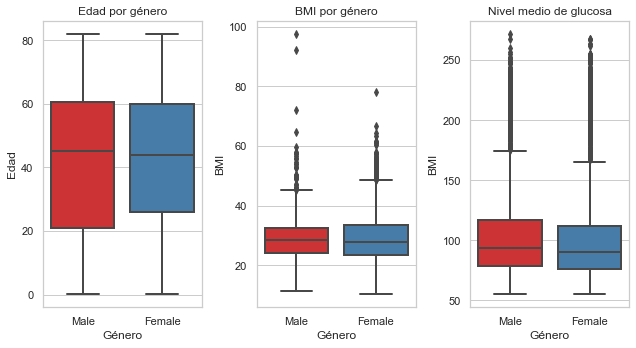

In [10]:
sns.set_theme(style="whitegrid") 
fig, axs = plt.subplots(ncols=3) # Gráfico para 3 columnas
fig.set_size_inches(9, 5) # Tamaño de los gráficos

axe1 = sns.boxplot(y="age",
                 x = "gender", 
                 data=dataset, 
                 palette="Set1",
                 linewidth=2,
                 ax = axs[0])
axe1.set_title("Edad por género")
axe1.set(xlabel='Género', ylabel='Edad')

axe2 = sns.boxplot(y="bmi",
                 x = "gender", 
                 data=dataset, 
                 palette="Set1",
                 linewidth=2,
                 ax = axs[1])
axe2.set_title("BMI por género")
axe2.set(xlabel='Género', ylabel='BMI')

axe3 = sns.boxplot(y="avg_glucose_level",
                 x = "gender", 
                 data=dataset, 
                 palette="Set1",
                 linewidth=2,
                 ax = axs[2])
axe3.set_title("Nivel medio de glucosa")
axe3.set(xlabel='Género', ylabel='BMI')

fig.tight_layout() # Separación entre los gráficos

Se aprecia en los gráficos Boxplot que tanto el BMI cómo el nivel medio de glucosa en la sangre presentan Outliers (valores atípicos) dentro del universo de datos analizados. Sin embargo, la edad no presenta outliers en los diferentes generos por lo que el primer pasos es entender como se componen todos los casos menores de 18 años.
Veamos en primer lugar como es su distribución:

Text(0.5, 1.0, 'Distribución de edad para Mujeres')

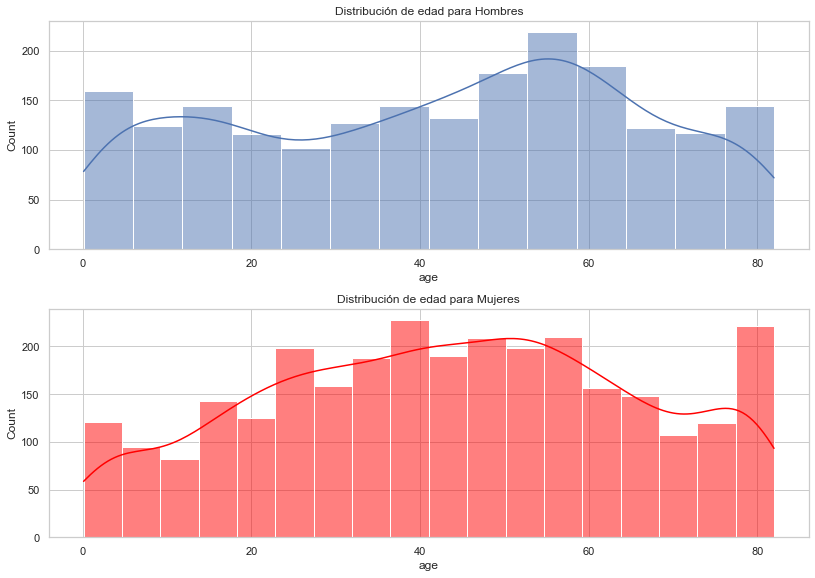

In [11]:
# NOTA: AL PARECER HISTPLOT FUNCIONA DE LA VERSION 3.8.5. EN ADELANTE, FUNCION DISTPLOT ESTÁ CON WARNING DE "DEPRECATED"

fig, axs = plt.subplots(nrows = 2) # Gráfico para 2 filas
fig.set_size_inches(12, 8.5) # Tamaño de los gráficos
fig.tight_layout(pad=3.0) # Separación entre los gráficos

axe1 = sns.histplot(data=dataset[dataset["gender"] == "Male"], x="age" ,palette="Set1", kde=True, ax = axs[0])
axe1.set_title("Distribución de edad para Hombres")

axe2 = sns.histplot(data=dataset[dataset["gender"] == "Female"], x="age" ,color='red', kde=True, ax = axs[1])
axe2.set_title("Distribución de edad para Mujeres")

La distribución muestra que no existen casos átipicos en edades extremas, por lo tanto se analizará a que corresponde algunos estados (tipo de trabajo, fumador y estado civil) para menores de 18 años

In [12]:
# ¿Qué sucede con la edad (menores de 18 años)?
edad = dataset[dataset["age"] < 18 ].copy()
display(edad.groupby('work_type').count()[["age"]])
display(edad.groupby('smoking_status').count()[["age"]])
display(edad.groupby('ever_married').count()[["age"]])

,age
work_type,
Govt_job,6
Never_worked,17
Private,130
Self-employed,12
children,671


,age
smoking_status,
Unknown,666
formerly smoked,23
never smoked,138
smokes,9


,age
ever_married,
No,836


Vemos en primer lugar que hay 204 personas menores de 18 años que tiene un tipo de trabajo, que 32 personas son fumadores y ninguno de ellos está casado. 
Entonces, de estas 145 personas que puede tener un trabajo vemos lo siguiente:

In [13]:
posibles_trabajos = edad[(edad["work_type"] == "Govt_job") | (edad["work_type"] == "Private") | (edad["work_type"] == "employed")].copy()
display(posibles_trabajos.describe(include='all'))

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,136,136.000000,136.000000,136.0,136,136,136,136.000000,136.000000,136,136.0
unique,2,NaN,NaN,NaN,1,2,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,No,Private,Rural,NaN,NaN,never smoked,NaN
freq,77,NaN,NaN,NaN,136,130,77,NaN,NaN,70,NaN
mean,NaN,15.669118,0.007353,0.0,NaN,NaN,NaN,94.004412,27.063235,NaN,0.0
std,NaN,1.435297,0.085749,0.0,NaN,NaN,NaN,28.853650,9.224258,NaN,0.0
min,NaN,8.000000,0.000000,0.0,NaN,NaN,NaN,55.410000,16.600000,NaN,0.0
25%,NaN,15.000000,0.000000,0.0,NaN,NaN,NaN,75.592500,22.350000,NaN,0.0
50%,NaN,16.000000,0.000000,0.0,NaN,NaN,NaN,87.130000,24.650000,NaN,0.0
75%,NaN,17.000000,0.000000,0.0,NaN,NaN,NaN,108.835000,29.325000,NaN,0.0


In [14]:
edad_minima = posibles_trabajos["age"].min()
tipos_trabajos = posibles_trabajos[posibles_trabajos["age"]==edad_minima]["work_type"]
print(f"La edad mínima de menor trabajando es de {edad_minima} años. Además, la actividad de este niño es {tipos_trabajos.iloc[0]}")

La edad mínima de menor trabajando es de 8.0 años. Además, la actividad de este niño es Private


Se asume como un caso real considerar que un menor de edad tenga un trabajo privado. 
Por otro lado, para entender que sucede con los valores atípicos del BMI se tiene lo siguiente (se tomarán BMI mayores a 40):

In [15]:
# Se asume una estatura promedio de 175 cm para hombres y 165 para mujeres
def posible_peso(datos):
    """
    El BMI de cálcula cómo: BMI = Masa / Estatura^2, por lo tanto Masa = BMI * Estatura^2
    """
    estatura_mujer = 1.65
    estatura_hombre = 1.75
    BMI = list(datos["bmi"].iloc[:])
    genero = list(datos["gender"].iloc[:])
    masa = []
    i = 0
    for gen in genero:
        if gen == "Female":
            peso = round(BMI[i] * estatura_mujer * estatura_mujer,2)
            masa.append([peso,gen])
        else:
            peso = round(BMI[i] * estatura_hombre * estatura_hombre,2)
            masa.append([peso,gen])
        i += 1
    return masa

bmi_analisis = dataset[dataset["bmi"]>=40].copy()
posible_peso_genero = posible_peso(bmi_analisis)
p = [x for x,v in posible_peso_genero]
g = [v for x,v in posible_peso_genero]
peso_estimado = pd.DataFrame({"peso_estimado": p, "genero": g})
display(peso_estimado.groupby("genero")[["peso_estimado"]].aggregate([min, np.median, max]))

peso_estimado                 
                 min   median     max
genero                               
Female         108.9  119.520  212.35
Male           122.5  132.455  298.90

#### Por lo tanto, al analizar los posibles casos atípicos vemos que :
- En la edad se encontraron casos reales, por lo que no se realizará ninguna modificación en el dataframe.
- Asimismo, los valores elevados de glucosa media en la sangre podrían corresponder a personas con diábetes, por lo tanto son valores que se mantienen dentro de la realidad.
- Por último, en el BMI vemos que los valores atípicos corresponden a obesidades u obesidades extremas; en el caso de los hombres llega hasta los 298,9 kg y las mujeres hasta 212,35 kg, con una media de 132,5 y 119,5 kg respectivamente. Por lo tanto, son valores que podrían estar dentro de la realidad mundial.

Por último, vemos la cantidad de casos con pacientes sanos y lo que han tenido un accidente cardivascular

In [16]:
dataset["stroke"].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [17]:
dataset[dataset["stroke"] == 1]["gender"].value_counts()

Female    120
Male       89
Name: gender, dtype: int64

Es importante notar que solo casi un 5% del dataset corresponden a casos con un previo accidente cerebrovascular, y tiende a ser una distribución homogenea entre hombres y mujeres.

## Capítulo 3: Análisis descriptivo <a class="anchor" id="chapter3"></a>
- - -
### Sección 3.1: Nuevas Variables<a class="anchor" id="section_3_1"></a>

Se crearan tres nuevas categorias que pueden describir y entender de mejor manera al rango de cada pacientes, para ellos se tiene que:
- **Age**: Se trabajan con rangos etarios entre
    - Primera_Infancias: menores de 5 años
    - Infancia: entre 6 a 11 años, ambos inclusives
    - Adolescencia: entr 12 y 17 años, ambos inclusives
    - Adulto_Joven: Entre 18 y 26 años, ambos inclusives
    - Adultez: Entre 27 y 59 años, ambos inclusives
    - Vejez: Iguales o mayores de 60
---    
- **BMI**: Se describe en base a la información médica
    - Por_debajo_peso: valores menores a 18,5
    - Saludable: 18,5 a 30, ambos inclusives
    - Sobrepeso: mayores de  30 hasta 40
    - Obesidad_extrema: mayores de 40
---
- **avg_glucose_level**
    - Hipoglecemia: Menores a 70
    - Normal: entre 70 a 120
    - Prediabetes: mayores de 120 hasta 180
    - Diabetes: mayores de 180

**Nota**: A continuación se construiran 3 funciones para obtener las variables descriptivas de la **edad**, **bmi** y las **glucosa**. Posteriormente se comparará su rendimiento con el método **cut** Pandas para ilustrar sus grandes diferencias. 

In [18]:
def rangoetario(df):
#     """"
#     Se trabajan con valores enteros, según las deficiones establecidas
#     """"
    def_etario = {tuple(np.arange(0,6)): "Primera_Infancia",
                  tuple(np.arange(6,12)): "Infancia",
                  tuple(np.arange(12,18)): "Adolescencia",
                  tuple(np.arange(18,27)): "Adulto_Joven",
                  tuple(np.arange(27,60)): "Adultez",
                  tuple(np.arange(60,150)): "Vejez"}
    lista = []
    for dato in round(df["age"],0):
        for key, value in def_etario.items():
            if dato in key: 
                lista.append(value)
    return lista

In [19]:
def rangoazucar(df):
#     """"
#     Se trabajan con valores enteros, según las deficiones establecidas
#     """"
    def_azucar = {tuple(np.arange(0,70)): "Hipoglecemia",
                  tuple(np.arange(70,121)): "Normal",
                  tuple(np.arange(121,181)): "Prediabetes",
                  tuple(np.arange(181,1000)): "Diabetes"}
    lista = []
    for dato in round(df["avg_glucose_level"],0):
        for key, value in def_azucar.items():
            if dato in key: 
                lista.append(value)
    return lista

In [20]:
def rangobmi(df):
#     """"
#     Se trabajan con valores enteros, según las deficiones establecidas
#     """"
    def_bmi = {tuple(np.arange(0,19)): "Por_debajo_peso",
                  tuple(np.arange(19,31)): "Saludable",
                  tuple(np.arange(31,41)): "Sobrepeso",
                  tuple(np.arange(41,1000)): "Obesidad_extrema"}
    lista = []
    for dato in round(df["bmi"],0):
        for key, value in def_bmi.items():
            if dato in key: 
                lista.append(value)
    return lista

In [21]:
lista1 = rangoetario(dataset)
lista2 = rangoazucar(dataset)
lista3 = rangobmi(dataset)

dataset = dataset.assign(rango_etario = lista1, rango_azucar = lista2, rango_bmi = lista3)
dataset.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,rango_etario,rango_azucar,rango_bmi
id,,,,,,,,,,,,,,
71447,Male,52.0,0,1,Yes,Private,Urban,124.49,29.0,never smoked,0,Adultez,Prediabetes,Saludable
39927,Male,40.0,0,0,Yes,Private,Rural,56.07,26.6,never smoked,0,Adultez,Hipoglecemia,Saludable
2730,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0,Adultez,Normal,Sobrepeso
18266,Female,67.0,0,0,Yes,Private,Rural,102.89,26.4,never smoked,0,Vejez,Normal,Saludable
60159,Female,29.0,0,0,No,Govt_job,Rural,118.61,26.5,never smoked,0,Adultez,Normal,Saludable
28478,Female,31.0,0,0,Yes,Private,Urban,82.18,42.7,never smoked,0,Adultez,Normal,Obesidad_extrema
12134,Female,53.0,0,0,Yes,Govt_job,Rural,87.62,33.7,smokes,0,Adultez,Normal,Sobrepeso
50373,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0,Primera_Infancia,Hipoglecemia,Por_debajo_peso
35927,Male,65.0,0,0,Yes,Private,Urban,88.57,29.0,smokes,0,Vejez,Normal,Saludable


Como punto importante, se puede comparar la función realizada para obtener los diferentes rangos con el métido **cut** de Pandas y ver las diferencias en los tiempos de cálculo. 

In [23]:
%%time
# Usando Cut
test = dataset.copy()
test['test'] = pd.cut(x=round(test['bmi'],0), bins=[0,18,30,41,1000],
                    labels=['Por_debajo_peso', 'Saludable', 'Sobrepeso',
                            'Obesidad_extrema'])

Wall time: 2 ms


In [64]:
test.sample(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,rango_etario,rango_azucar,rango_bmi,hipertension_dummie,cardiopatia,test
id,,,,,,,,,,,,,,,,,
38578,Female,35.0,0,0,No,Private,Urban,71.81,25.4,Unknown,0,Adultez,Normal,Saludable,No,No,Saludable
41927,Female,28.0,0,0,Yes,Private,Rural,64.64,22.1,never smoked,0,Adultez,Hipoglecemia,Saludable,No,No,Saludable


In [24]:
%%time
# Usando Función creada
test2 = rangobmi(dataset)

Wall time: 5.75 s


**Es muy importante notar la diferencia en el tiempo de cálculo entre ambos métodos utilizados. Con "cut" tomo 3 ms, sin embargo la función construida "a lo bruto" tardó casi 2000 veces más, y es para un dataset bastante pequeño. Es aquí la importancia de la programación más eficiente cuando se está en un entorno BigData.**

In [25]:
# Construcción de variables categóticas
dataset["hipertension_dummie"] = np.where(dataset["hypertension"]== 1, "Si", "No")
dataset["cardiopatia"] = np.where(dataset["heart_disease"]== 1, "Si", "No")

Anteriormente se agregaron las variables para comprender de una mejor manera como se comportan diferentes parámetros para las personas que sufrieron o no un ataque cerebrovascular. 

### Sección 3.2: Visualización de la información<a class="anchor" id="section_3_2"></a>

A continuación se mostrarán diferentes relaciones para entender como se comporta el Stroke para diferentes sipos de pacientes

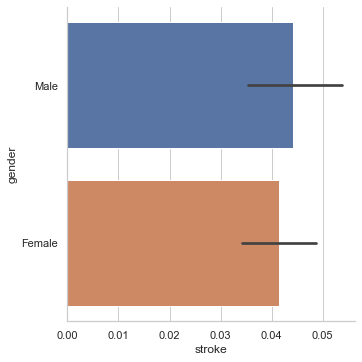

In [26]:
f1 = sns.catplot(x="stroke", y="gender", kind = "bar", data=dataset)

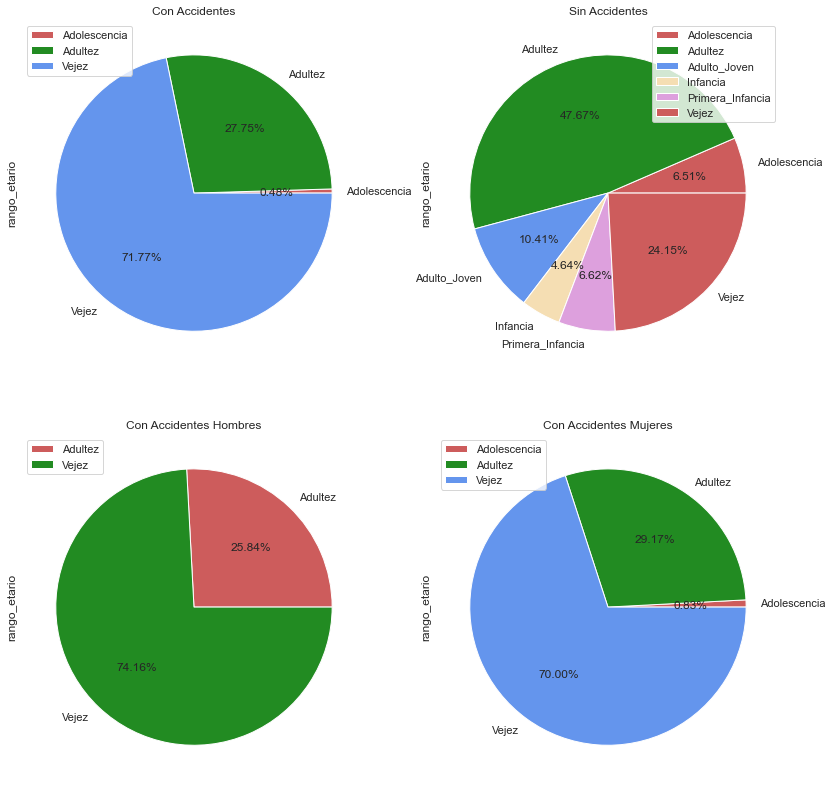

In [27]:
fig, axs = plt.subplots(ncols = 2, nrows = 2) # Gráfico para 2 filas y 2 columnas
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=3.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


stroke_pos = dataset[dataset['stroke'] == 1].groupby(['rango_etario'])[['rango_etario']].count()
stroke_neg = dataset[dataset['stroke'] == 0].groupby(['rango_etario'])[['rango_etario']].count()
stroke_pos_male = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Male")].groupby(['rango_etario'])[['rango_etario']].count()
stroke_pos_female = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Female")].groupby(['rango_etario'])[['rango_etario']].count()


f1 = stroke_pos.plot(y='rango_etario', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,0])
f2 = stroke_neg.plot(y='rango_etario', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,1])
f3 = stroke_pos_male.plot(y='rango_etario', kind='pie', title= "Con Accidentes Hombres", autopct='%1.2f%%', colors = colores, ax = axs[1,0])
f4 = stroke_pos_female.plot(y='rango_etario', kind='pie', title= "Con Accidentes Mujeres", autopct='%1.2f%%', colors = colores, ax = axs[1,1])

Según el análisis por rango etario, se aprecia que la mayor cantidad de accidentes cerebrovasculares se dan en la vejez (74% en hombres y 70% en mujeres) y luego en en la adultez (26% hombres y 29% mujeres), sumando el 99% de los casos totales. 

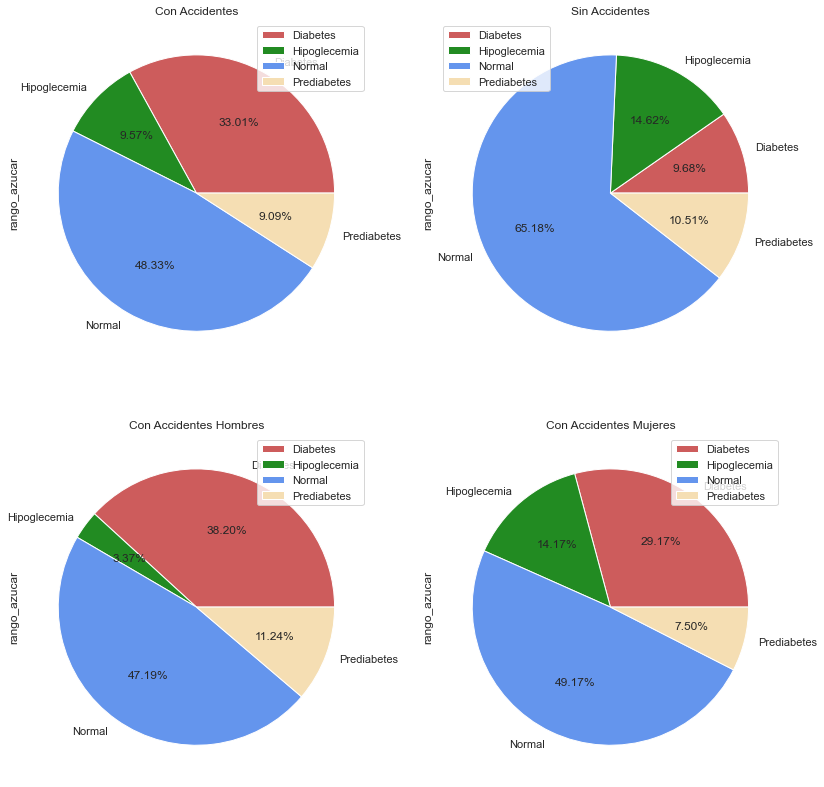

In [28]:
fig, axs = plt.subplots(ncols = 2, nrows = 2) # Gráfico para 2 filas y 2 columnas
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=3.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


azucar_pos = dataset[dataset['stroke'] == 1].groupby(['rango_azucar'])[['rango_azucar']].count()
azucar_neg = dataset[dataset['stroke'] == 0].groupby(['rango_azucar'])[['rango_azucar']].count()
azucar_pos_male = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Male")].groupby(['rango_azucar'])[['rango_azucar']].count()
azucar_pos_female = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Female")].groupby(['rango_azucar'])[['rango_azucar']].count()


f1 = azucar_pos.plot(y='rango_azucar', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,0])
f2 = azucar_neg.plot(y='rango_azucar', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,1])
f3 = azucar_pos_male.plot(y='rango_azucar', kind='pie', title= "Con Accidentes Hombres", autopct='%1.2f%%', colors = colores, ax = axs[1,0])
f4 = azucar_pos_female.plot(y='rango_azucar', kind='pie', title= "Con Accidentes Mujeres", autopct='%1.2f%%', colors = colores, ax = axs[1,1])

Para las condiciones de glucosa en la sangre, vemos que en las personas con accidentes cerebrovasculares no hay una condición marcada de diabetes o prediabetes, sin embargo representan un 20% más que las personas que nunca han tenido un accidente.
Para las personas con accidentes, la distribución tiende a no cambiar.

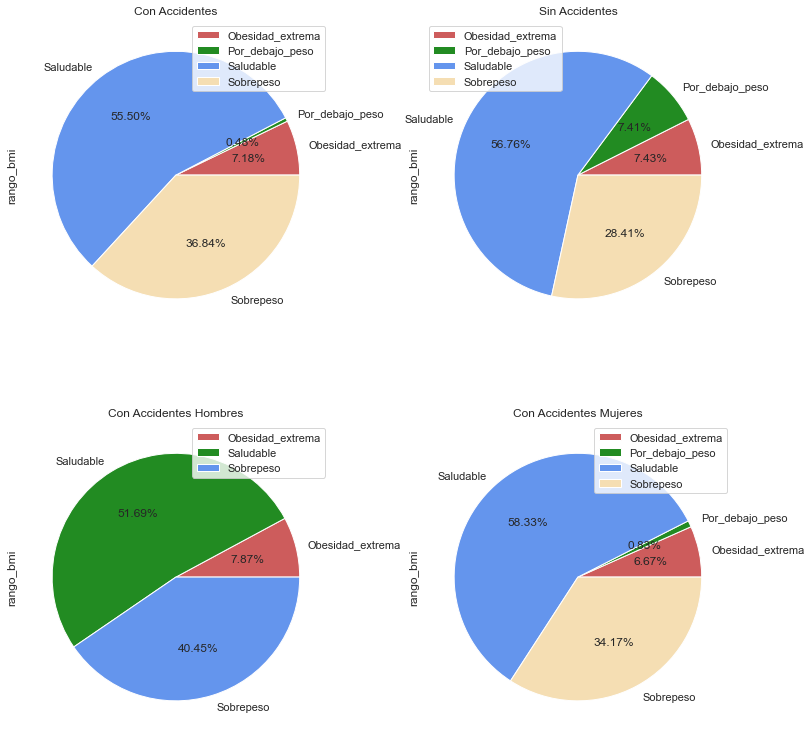

In [29]:
fig, axs = plt.subplots(ncols = 2, nrows = 2) # Gráfico para 2 filas y 2 columnas
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=5.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


bmi_pos = dataset[dataset['stroke'] == 1].groupby(['rango_bmi'])[['rango_bmi']].count()
bmi_neg = dataset[dataset['stroke'] == 0].groupby(['rango_bmi'])[['rango_bmi']].count()
bmi_pos_male = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Male")].groupby(['rango_bmi'])[['rango_bmi']].count()
bmi_pos_female = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Female")].groupby(['rango_bmi'])[['rango_bmi']].count()


f1 = bmi_pos.plot(y='rango_bmi', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,0])
f2 = bmi_neg.plot(y='rango_bmi', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,1])
f3 = bmi_pos_male.plot(y='rango_bmi', kind='pie', title= "Con Accidentes Hombres", autopct='%1.2f%%', colors = colores, ax = axs[1,0])
f4 = bmi_pos_female.plot(y='rango_bmi', kind='pie', title= "Con Accidentes Mujeres", autopct='%1.2f%%', colors = colores, ax = axs[1,1])

En este caso del BMI, tiende a mantenerse una distribución más estable, aunque existe un incremento del 8% en los casos de obesidad, reduciéndose los que están por debajo del peso. 
Por otro lado, vemos que en los hombres con accidentes cerebrovasculares presentan un 6% más de casos que en las mujeres, sin embargo estó se sa porque la cantidad de hombres por debajo del peso tiende a 0.

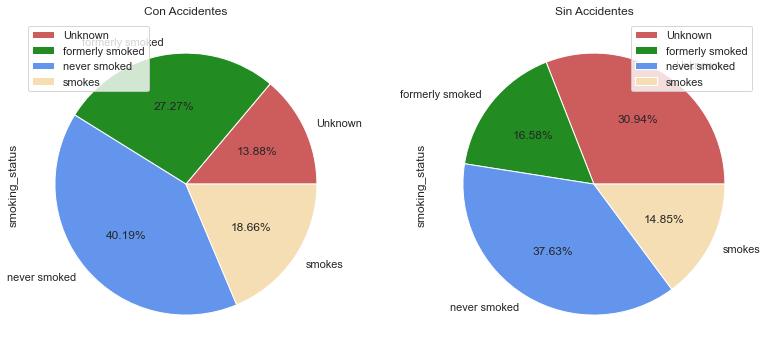

In [30]:
fig, axs = plt.subplots(ncols = 2) # Gráfico para de 2 columnass
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=4.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


fumador_pos = dataset[dataset['stroke'] == 1].groupby(['smoking_status'])[['smoking_status']].count()
fumador_neg = dataset[dataset['stroke'] == 0].groupby(['smoking_status'])[['smoking_status']].count()

f1 = fumador_pos.plot(y='smoking_status', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0])
f2 = fumador_neg.plot(y='smoking_status', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[1])

Para la condición de fumador no se aprecia una diferencia significativa entre ambos casos (solo un aumento en los casos sin conocer).

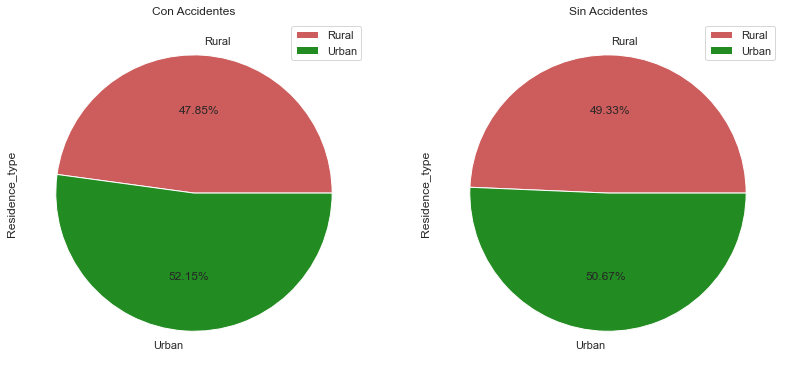

In [31]:
fig, axs = plt.subplots(ncols = 2) # Gráfico para 2 columnas
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=3.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


residencia_pos = dataset[dataset['stroke'] == 1].groupby(['Residence_type'])[['Residence_type']].count()
residencia_neg = dataset[dataset['stroke'] == 0].groupby(['Residence_type'])[['Residence_type']].count()


f1 = residencia_pos.plot(y='Residence_type', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0])
f2 = residencia_neg.plot(y='Residence_type', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[1])


El lugar de residencia de las personas tampoco marca una diferencia significativa en los accidentes cerebrovasculares. 

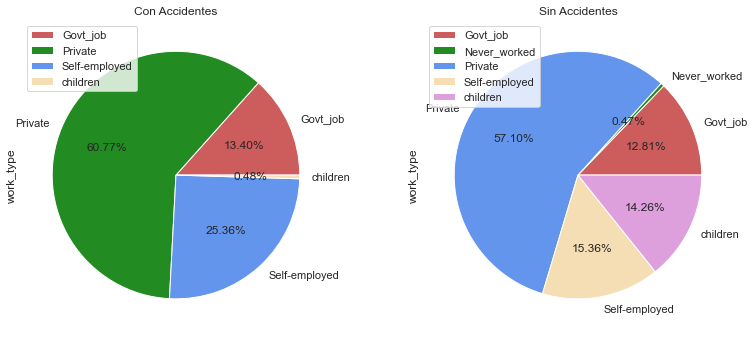

In [32]:
fig, axs = plt.subplots(ncols = 2) # Gráfico para 2 columnas
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=5.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


work_pos = dataset[dataset['stroke'] == 1].groupby(['work_type'])[['work_type']].count()
work_neg = dataset[dataset['stroke'] == 0].groupby(['work_type'])[['work_type']].count()

f1 = work_pos.plot(y='work_type', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0])
f2 = work_neg.plot(y='work_type', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[1])

Para el tipo de trabajo, tampoco se parecia una diferencia significativa entre quienes sufren o no accidentes cerebrovasculares.

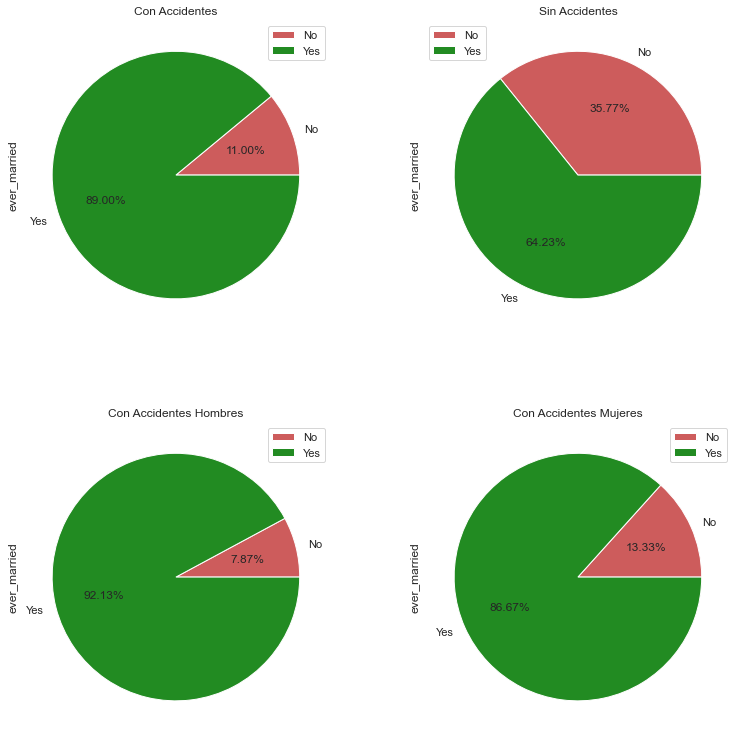

In [33]:
fig, axs = plt.subplots(ncols = 2, nrows = 2) # Gráfico para 2 filas y 2 columnas
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=5.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


married_pos = dataset[dataset['stroke'] == 1].groupby(['ever_married'])[['ever_married']].count()
married_neg = dataset[dataset['stroke'] == 0].groupby(['ever_married'])[['ever_married']].count()
married_pos_male = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Male")].groupby(['ever_married'])[['ever_married']].count()
married_pos_female = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Female")].groupby(['ever_married'])[['ever_married']].count()


f1 = married_pos.plot(y='ever_married', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,0])
f2 = married_neg.plot(y='ever_married', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,1])
f3 = married_pos_male.plot(y='ever_married', kind='pie', title= "Con Accidentes Hombres", autopct='%1.2f%%', colors = colores, ax = axs[1,0])
f4 = married_pos_female.plot(y='ever_married', kind='pie', title= "Con Accidentes Mujeres", autopct='%1.2f%%', colors = colores, ax = axs[1,1])

De manera poco intuituiva, las personas casadas tienden a tener un 20% más de accidentes cerebrovascuilares, en donde los hombres sufren uin 4% más que las mujeres, llegando a un 90% en promedio. 

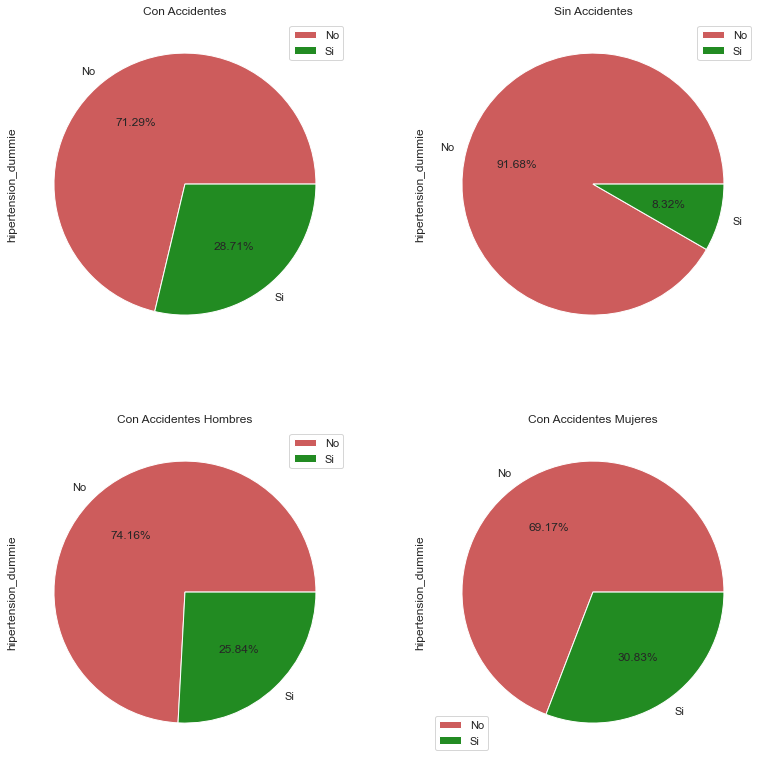

In [34]:
fig, axs = plt.subplots(ncols = 2, nrows = 2) # Gráfico para 2 filas y 2 columnas
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=4.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


tension_pos = dataset[dataset['stroke'] == 1].groupby(['hipertension_dummie'])[['hipertension_dummie']].count()
tension_neg = dataset[dataset['stroke'] == 0].groupby(['hipertension_dummie'])[['hipertension_dummie']].count()
tension_pos_male = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Male")].groupby(['hipertension_dummie'])[['hipertension_dummie']].count()
tension_pos_female = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Female")].groupby(['hipertension_dummie'])[['hipertension_dummie']].count()


f1 = tension_pos.plot(y='hipertension_dummie', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,0])
f2 = tension_neg.plot(y='hipertension_dummie', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,1])
f3 = tension_pos_male.plot(y='hipertension_dummie', kind='pie', title= "Con Accidentes Hombres", autopct='%1.2f%%', colors = colores, ax = axs[1,0])
f4 = tension_pos_female.plot(y='hipertension_dummie', kind='pie', title= "Con Accidentes Mujeres", autopct='%1.2f%%', colors = colores, ax = axs[1,1])

Las personas con hipertensión presentan casi un 20% más accidentes cardiovasculares. Al aperturar por género, vemos que en mujeres tienen a ser un 5% más que los hombres.


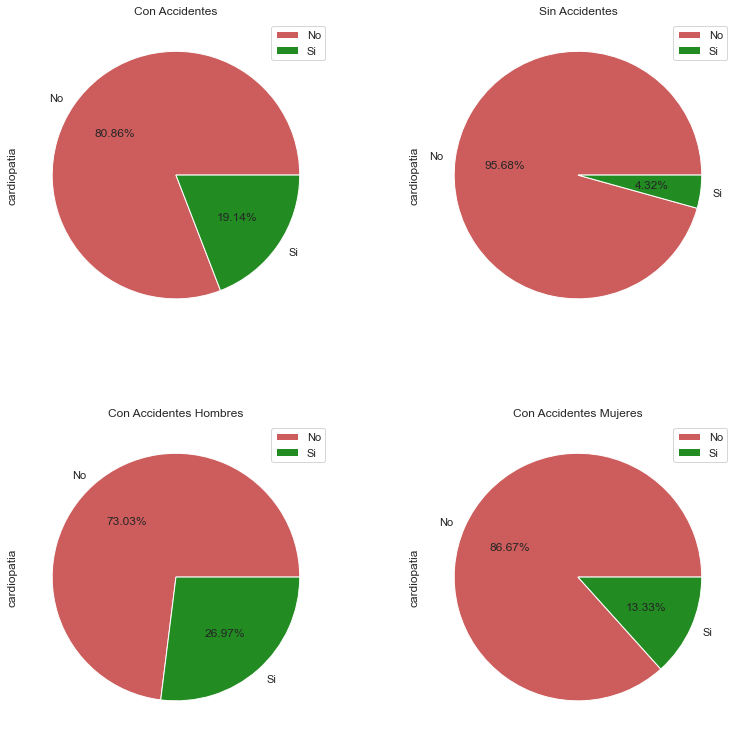

In [35]:
fig, axs = plt.subplots(ncols = 2, nrows = 2) # Gráfico para 2 filas
fig.set_size_inches(12, 12) # Tamaño de los gráficos
fig.tight_layout(pad=5.0) # Separación entre los gráficos
colores = ["indianred","forestgreen","cornflowerblue", "wheat", "plum"]


cardio_pos = dataset[dataset['stroke'] == 1].groupby(['cardiopatia'])[['cardiopatia']].count()
cardio_neg = dataset[dataset['stroke'] == 0].groupby(['cardiopatia'])[['cardiopatia']].count()
cardio_pos_male = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Male")].groupby(['cardiopatia'])[['cardiopatia']].count()
cardio_pos_female = dataset[(dataset['stroke'] == 1) & (dataset['gender'] == "Female")].groupby(['cardiopatia'])[['cardiopatia']].count()


f1 = cardio_pos.plot(y='cardiopatia', kind='pie', title= "Con Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,0])
f2 = cardio_neg.plot(y='cardiopatia', kind='pie', title= "Sin Accidentes", autopct='%1.2f%%', colors = colores, ax = axs[0,1])
f3 = cardio_pos_male.plot(y='cardiopatia', kind='pie', title= "Con Accidentes Hombres", autopct='%1.2f%%', colors = colores, ax = axs[1,0])
f4 = cardio_pos_female.plot(y='cardiopatia', kind='pie', title= "Con Accidentes Mujeres", autopct='%1.2f%%', colors = colores, ax = axs[1,1])

En la cardiopatía vemos un comportamiento similar a la hipertensión, sin embargo en los hombres se presenta en un 10% más que en las mujeres.

## Sección 4: Análisis Estadístico y Regresión <a class="anchor" id="chapter4"></a>

Es importante destacar no se puede llevar a cabo un análisis exahustivo de correlaciones ya que las mayor cantidad de variables son categóricas. Sin embargo, el análisis descriptivo previo pemitió entender qué variables tienen un rol más importante en la predicción para determinar si la persona tiene un no tiene un accidente cerebrovascular.  

In [38]:
corr_data = dataset[["age","bmi","avg_glucose_level","stroke","gender"]].corr()
#display(corr_data)
corr_data.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1)

,age,bmi,avg_glucose_level,stroke
age,1.000000,0.333314,0.236000,0.232313
bmi,0.333314,1.000000,0.175672,0.042341
avg_glucose_level,0.236000,0.175672,1.000000,0.138984
stroke,0.232313,0.042341,0.138984,1.000000


De la tabla anterior se aprecia que no existen correlaciones fuertes entre las variables del problema (Edad, BMI y nivel promedio de glucosa en la sangre).

A continuación se muestran gráficos del comportamiento y distribución de estas variables en fucnión del Stroke (0,1).

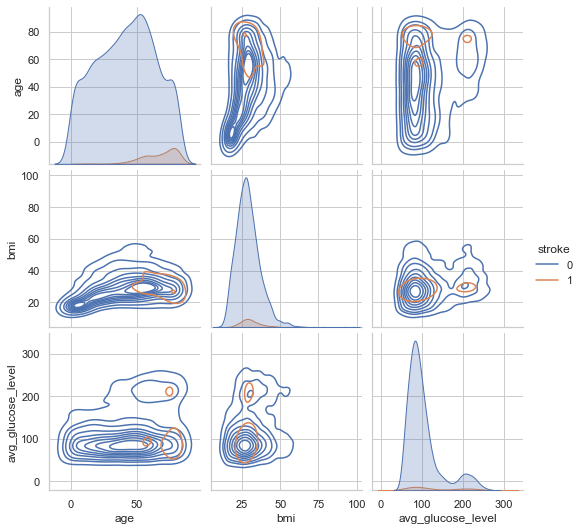

In [39]:
data_continua = dataset[["age","bmi","avg_glucose_level","stroke","gender"]].copy()

f1 = sns.pairplot(data_continua, hue = "stroke", kind = "kde")

Vemos que la distribución de los casos con Stroke = 1  tienden a formar clusters para valores de BMI y glucosa fuera de los rangos normales establecidos, concentrándose en personas mayores de 50 años. 

Al revisar el comportamiento de la edad, BMI y el nivel de glucosa en la sangre en función del género encontramos que sus distribuciones tienden a mantener la misma tendencia para ambos casos. 

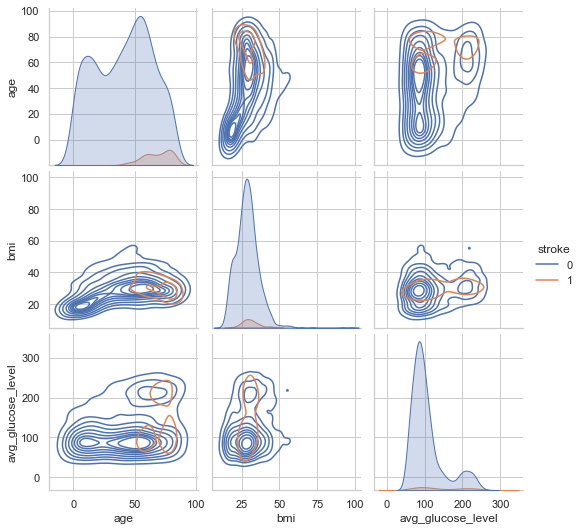

In [40]:
f2 = sns.pairplot(data_continua[data_continua["gender"]=="Male"], hue = "stroke", kind = "kde")

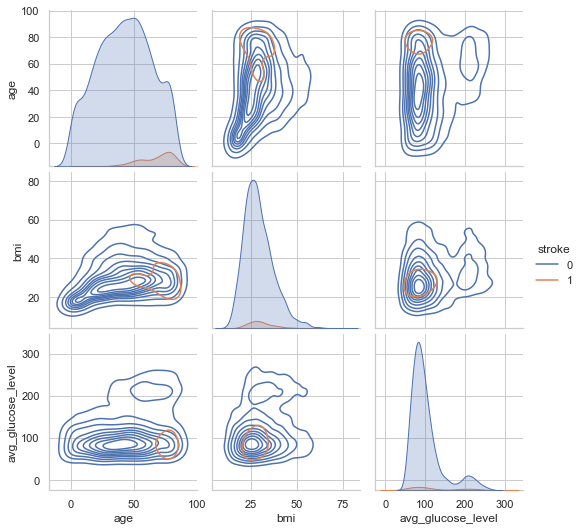

In [41]:
f2 = sns.pairplot(data_continua[data_continua["gender"]=="Female"], hue = "stroke", kind = "kde")

Es importante considerar que aunque la persona esté por fuera de los valores normales para cada parámetro no significa que tendrá un Stroke = 1 (accidente cerebrovascular), sin embargo es posible realizar una combinatoria de todas ellas mediante un modelo de Machine Learning para predecir la probabilidad de que tenga Stroke = 1. 


A continuación se introduce un modelo logístico para determinar la predicción si es que un paciente puede o no sufrir un accidentes cerebrovascular. Como se tiene una muestra muy desvalanceda y una cantidad muy baja de **stroke = 1** , se tomarán un 30% de train set. Además, se evaluará su **accuracy** midiendo el **AUC-ROC**

In [42]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random

Se eliminan las variables creadas y las que no tienen una diferencia significativa en la evaluación de personas con o sin accidentes cerebrovasculares (según análisis anterior). Ademas se torman como variable numérica el género y situación marital:

In [43]:
dataset["genero"] = np.where(dataset["gender"] == "Male",1,0) # Male = 1 / Female = 0
dataset["marital"] = np.where(dataset["ever_married"] == "Yes",1,0) # Yes = 1 / no = 0

In [44]:
dataset_filtrado = dataset.drop((["work_type","Residence_type",
                                  "smoking_status","rango_azucar",
                                  "rango_bmi","hipertension_dummie",
                                  "cardiopatia","rango_etario",
                                 "gender","ever_married"]), axis = 1)
dataset_filtrado.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,genero,marital
id,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,1,1
31112,80.0,0,1,105.92,32.5,1,1,1
60182,49.0,0,0,171.23,34.4,1,0,1
1665,79.0,1,0,174.12,24.0,1,0,1
56669,81.0,0,0,186.21,29.0,1,1,1


A continuación se fija una "semilla" para replicar los resultados obtenidos (eligiendo de forma aleatoria el Train y el Test set). 

In [45]:
import random
random.seed(10)

features = dataset_filtrado.drop("stroke", axis = 1)
target = dataset_filtrado["stroke"]
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.7)

In [46]:
print(f"valores para entrenamiento:\n {y_train.value_counts()}\n")
print(f"valores para testeo:\n {y_test.value_counts()}")

valores para entrenamiento:
 0    3285
1     150
Name: stroke, dtype: int64

valores para testeo:
 0    1414
1      59
Name: stroke, dtype: int64


A continuación se realiza la predicción del modelo logístico tomando un solver linea, con un número máximo de 1000 itereaciones, una regularización L2 ("Ridge Regression") y una tolerancia de 1e-4. Por simplicidad se omitirá realizar "Cross Validation"

In [47]:
logistic_regression = LogisticRegression(solver = "liblinear", max_iter = 1000, penalty='l2', tol=0.0001)
logistic_regression.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Una vez entrenado el modelo, se procede a realizar la predicción del Test Set. 

In [49]:
y_pred = logistic_regression.predict(x_test)

Luego revisamos las métricas de error comparando el target predicho con el target real

In [50]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print(f" La precisión es (Ínidice de Jaccard): {round(accuracy_percentage,2)}%")

 La precisión es (Ínidice de Jaccard): 95.99%


Este 96% de precisión puede ser un sesgo dado que el modelo entrenó con una muestra desvalanceada para los Stroke = 1 y Stroke = 0, por lo tanto hay que ajustar este valor considerando una medición que considere dicho desbalance. Para ello, se obtendrá la precisión tomando el área bajo la curva ROC (AUC-ROC).

In [52]:
precision = roc_auc_score(y_test, logistic_regression.decision_function(x_test))
print(f" La precisión es (AUC_ROC): {round(precision*100,2)}%")

 La precisión es (AUC_ROC): 83.56%


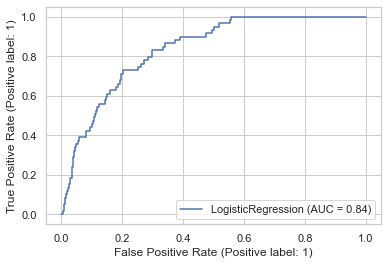

In [53]:
metrics.plot_roc_curve(logistic_regression, x_test, y_test)
plt.show()

Es posible apreciar una precisión más real del modelo que considera el desbalance del target, siendo un valor cercano a un 84%, vale decir, el modelo predice correctamente a 84 de 100 casos. Por supuesto, en el área de salud no es un buen valor ya que debemos siempre buscar un valor lo más cercano al 100%. De todas maneras, con un estudio bastante siemple fue posible ajustar un modelo con sobre el 80% de precisión, siendo el punto de partida para mejorar con modelos más robusto o mayor cantidad de información.

## Sección 5: Conclusiones <a class="anchor" id="chapter5"></a>

**En primer lugar se ha aplicado una limpieza y entendimiento inicial del Dataset, donde re revisaron los siguientes aspectos**:
- La edad no tuve problemas de casos atípicos o datos que fuesen fuera de la realidad.
- Asimismo, los valores elevados de glucosa media en la sangre son datos que corresponden a personas con prediabetes o diabetes.
- Por último, en el BMI vimos que los valores atípicos correspondián a obesidades extremas. Por lo tanto, son valores que estaban dentro de la realidad mundial.

**Posteriormente se analizarón diferentes distribuciones de las condiciones que tenian las personas con o sin accidentes cerebrovasucales destacando que**:
- En donde en un 74%/70% ha ocurrido en personas hombres/mujeres mayores de 60 años
- Existe un aumento del 20% de condiciones de diabetes para las personas que han sufrido un accidente versus las que no.
- Para el BMI, la distribución tiende a mantenerse más estable, sin embargo los casos de obesidad aumentan un 8% para los casos con accidentes cerebrovasculares. 
- Tanto el cigarro, el lugar de residencia y el tipo de trabajo no se ven como una causa significativa en los accidentes cerebrovasculares.
- Particularmente, existe un aumento del 20% en los accidentes cerebrovasculares en las personas que están casadas. 
- La hipertensión y la cardiopatía también juegan un rol importante en los accidentes cerebrovasculares,  donde tienen un 20% más de casos que las personas que no han sufrido accidentes. La hipertensión influye más en mujeres, en cambio, en la cardiopatia influye más en lops hombres.

**Finalmente se construyó un modelo de predicción usando regresión logística para determinar si una persona puede o no tener un accidente cerebrovascular solo considerando variables clínica y su edad**
- La precisión del modelo alcanzó un 84% de precisión.
- Este es un punto de partida mejorar con modelos más robustos o considerar más información.